In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [46]:
#load preprocessed data
df=pd.read_csv("/content/final_ready_cleaned.csv")

In [47]:
df.head(5)

,ENCOUNTER,START,STOP,PATIENT,ORGANIZATION,PROVIDER,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,...,Respiratory_Rate,Systolic_BP,Smoking_Status,behavioral_finding,clinical_disorder,other_finding,social_finding,TOTAL_MED_COST,READMISSION_30,Hemoglobin_missing
0,d0dce63a-9322-369b-f831-28c51bd01e77,2017-10-23 19:19:19+00:00,2017-10-25 01:36:19+00:00,00109c3f-a1be-f591-05e0-dfb19afb89da,611047a3-d5a3-3697-bda4-7cbe0d6770e7,57247998-9d85-342c-a616-4f1a27bcc03d,Non-urgent orthopedic admission (procedure),106.85,10301.98,0.00,...,15.0,132.0,Never smoked tobacco (finding),3,16,11,6,36078.14,0,0
1,da8ffa1d-33ec-8b9a-bdbc-60f75f30bbe0,2018-09-23 00:29:54+00:00,2018-10-06 00:29:54+00:00,00109c3f-a1be-f591-05e0-dfb19afb89da,611047a3-d5a3-3697-bda4-7cbe0d6770e7,57247998-9d85-342c-a616-4f1a27bcc03d,Drug rehabilitation and detoxification (regime...,106.85,106.85,0.00,...,15.0,132.0,Never smoked tobacco (finding),3,16,11,6,36078.14,0,0
2,ba81f072-ecdb-3ef1-bd3d-400b54a3c7fd,2021-01-10 13:49:55+00:00,2021-01-21 13:49:55+00:00,00109c3f-a1be-f591-05e0-dfb19afb89da,611047a3-d5a3-3697-bda4-7cbe0d6770e7,57247998-9d85-342c-a616-4f1a27bcc03d,Drug rehabilitation and detoxification (regime...,106.85,106.85,0.00,...,15.0,132.0,Never smoked tobacco (finding),3,16,11,6,36078.14,0,0
3,4805655a-eb01-758a-7f98-d5310388cd20,2021-03-15 20:10:38+00:00,2021-03-16 20:10:38+00:00,00109c3f-a1be-f591-05e0-dfb19afb89da,611047a3-d5a3-3697-bda4-7cbe0d6770e7,57247998-9d85-342c-a616-4f1a27bcc03d,Admission to surgical department (procedure),106.85,13233.07,0.00,...,15.0,132.0,Never smoked tobacco (finding),3,16,11,6,36078.14,0,0
4,04ffc74e-9e4b-7065-e3d1-6e3e70ed4c56,1977-12-07 16:17:04+00:00,1977-12-08 16:17:04+00:00,00440932-12f3-f80a-d99e-6746cf225e3a,745e2ce1-6073-378f-b605-e54029ed80e8,93f29b5f-dba5-3d3e-805f-2e8687d79155,Admission to surgical department (procedure),106.85,13233.07,13183.07,...,12.0,108.0,Never smoked tobacco (finding),1,11,9,11,333294.98,0,0


In [48]:
#will set up visual style
sns.set(style="whitegrid")
plt.figure(figsize=(6,7))

<Figure size 600x700 with 0 Axes>

<Figure size 600x700 with 0 Axes>

<ipython-input-49-a319acbe2b41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='READMISSION_30',palette='Set2')


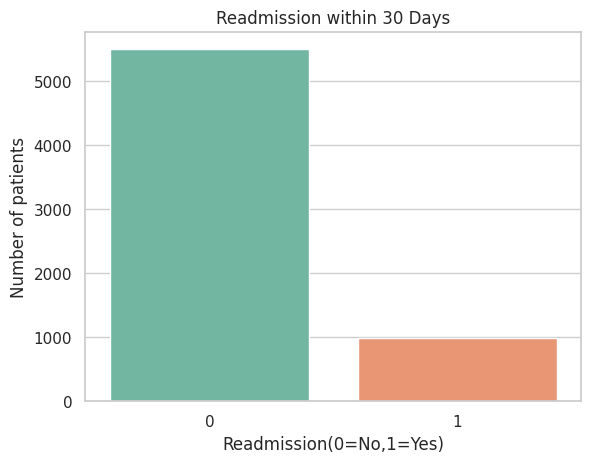

In [49]:
#Countplot of target variable
sns.countplot(data=df,x='READMISSION_30',palette='Set2')
plt.title("Readmission within 30 Days")
plt.xlabel("Readmission(0=No,1=Yes)")
plt.ylabel("Number of patients")
plt.show()

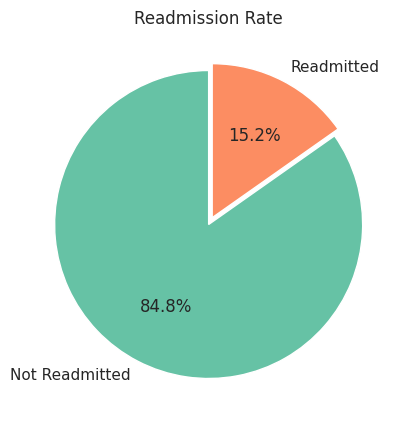

In [50]:
# Pie chart
readmit_counts = df['READMISSION_30'].value_counts()
labels = ['Not Readmitted', 'Readmitted']
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(5, 5))
plt.pie(readmit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05))
plt.title("Readmission Rate")
plt.show()

In [51]:
# Print proportions
print("Readmission Rate Breakdown:")
print(readmit_counts)
print("\nProportion of Readmitted Patients: {:.2f}%".format(100 * readmit_counts[1] / readmit_counts.sum()))

Readmission Rate Breakdown:
READMISSION_30
0    5497
1     988
Name: count, dtype: int64

Proportion of Readmitted Patients: 15.24%


In [52]:
df.rename(columns={
    'Body mass index (BMI) [Ratio]': 'BMI',
    'Hemoglobin A1c/Hemoglobin.total in Blood': 'Hemoglobin',
    'Pain severity - 0-10 verbal numeric rating [Score] - Reported': 'Pain_Severity',
    'Tobacco smoking status': 'Smoking_Status',
    'Systolic Blood Pressure': 'Systolic_BP',
    'Diastolic Blood Pressure': 'Diastolic_BP',
    'Heart rate': 'Heart_Rate',
    'Respiratory rate': 'Respiratory_Rate'
}, inplace=True)

In [53]:


# Drop leakage and post-outcome columns
df.drop(columns=['DEATHDATE', 'NEXT_ADMIT', 'DAYS_TO_READMIT'], inplace=True, errors='ignore')

# Impute BMI (only 2 missing)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

# Impute Hemoglobin + add missing indicator
df['Hemoglobin_missing'] = df['Hemoglobin'].isnull().astype(int)
df['Hemoglobin'].fillna(df['Hemoglobin'].median(), inplace=True)

# Impute TOTAL_MED_COST
df['TOTAL_MED_COST'].fillna(df['TOTAL_MED_COST'].median(), inplace=True)

# Save cleaned version
#df.to_csv("final_ready_cleaned.csv", index=False)
#print("✅ Cleaned dataset saved as 'final_ready_cleaned.csv'")


<ipython-input-53-b906fafaff8c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace=True)
<ipython-input-53-b906fafaff8c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

✅ Cleaned dataset saved as 'final_ready_cleaned.csv'


In [55]:
continous_vars =['AGE', 'BMI', 'LOS','Systolic_BP', 'Diastolic_BP','Heart_Rate', 'Respiratory_Rate','Hemoglobin']


📊 Feature: AGE
--------------------------------------------------


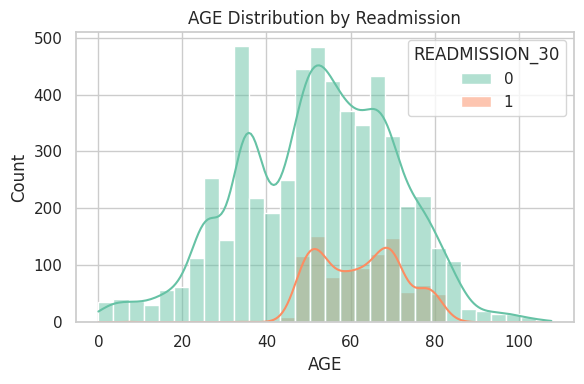

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


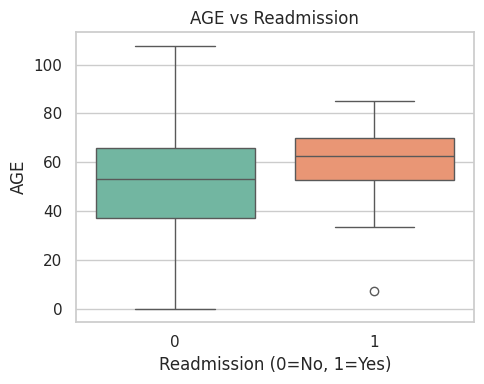

📊 Mann-Whitney U Test: p-value = 0.00000
✅ Statistically significant difference between groups.

📊 Feature: BMI
--------------------------------------------------


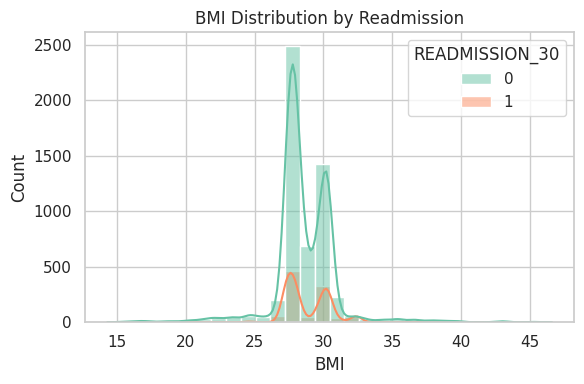

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


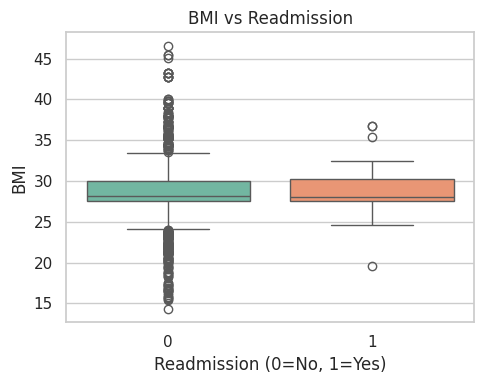

📊 Mann-Whitney U Test: p-value = 0.23361
⚠️ No significant difference detected.

📊 Feature: LOS
--------------------------------------------------


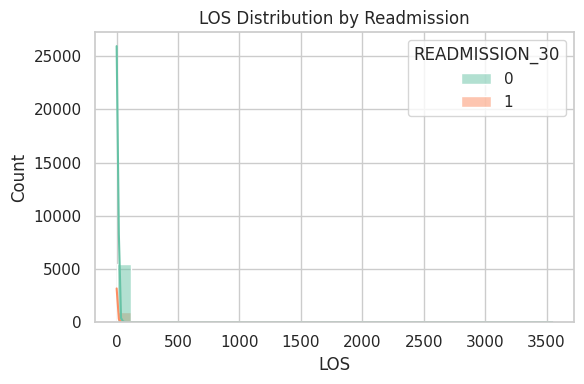

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


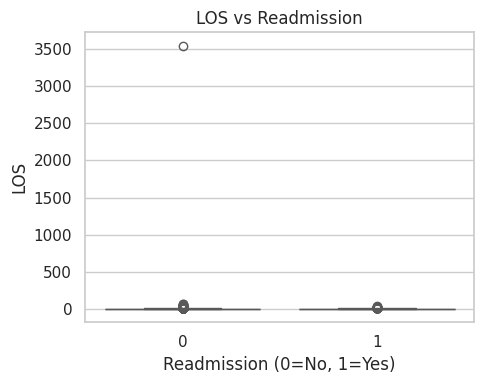

📊 Mann-Whitney U Test: p-value = 0.00000
✅ Statistically significant difference between groups.

📊 Feature: Systolic_BP
--------------------------------------------------


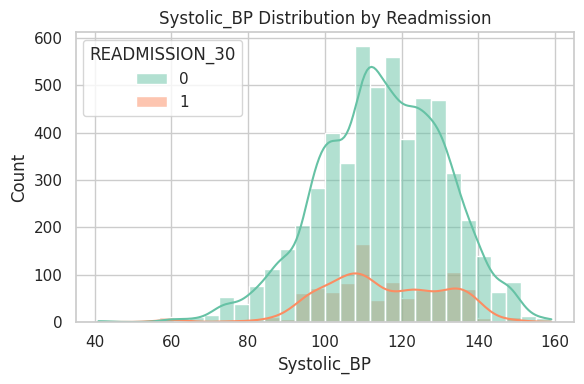

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


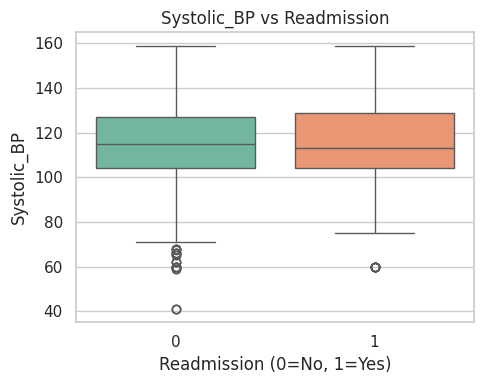

📊 Mann-Whitney U Test: p-value = 0.86006
⚠️ No significant difference detected.

📊 Feature: Diastolic_BP
--------------------------------------------------


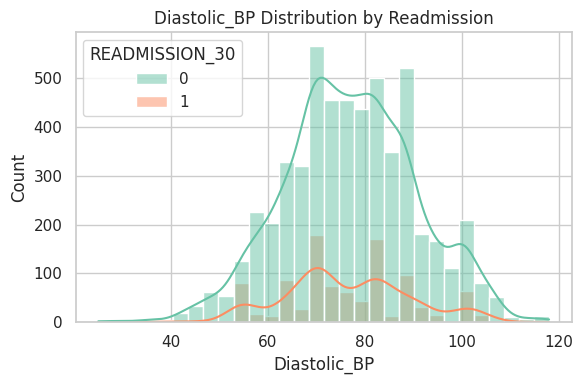

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


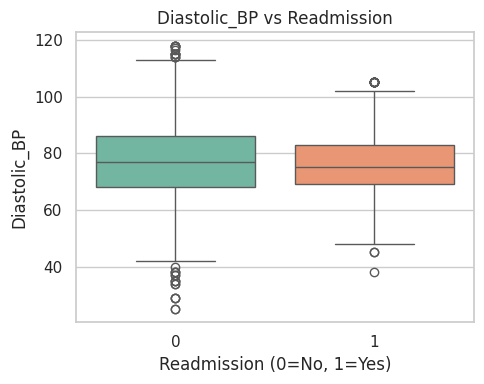

📊 Mann-Whitney U Test: p-value = 0.09583
⚠️ No significant difference detected.

📊 Feature: Heart_Rate
--------------------------------------------------


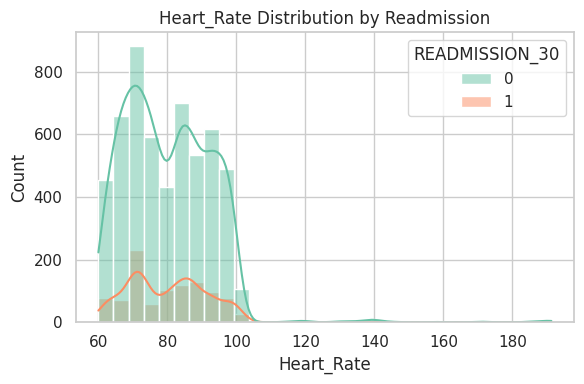

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


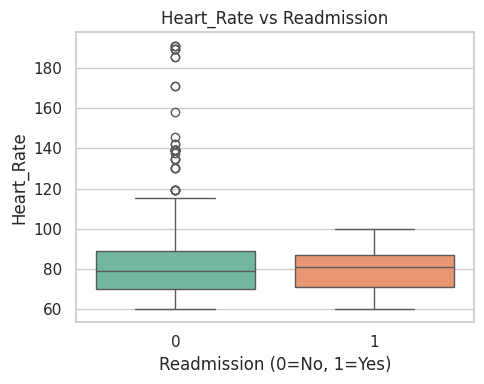

📊 Mann-Whitney U Test: p-value = 0.73933
⚠️ No significant difference detected.

📊 Feature: Respiratory_Rate
--------------------------------------------------


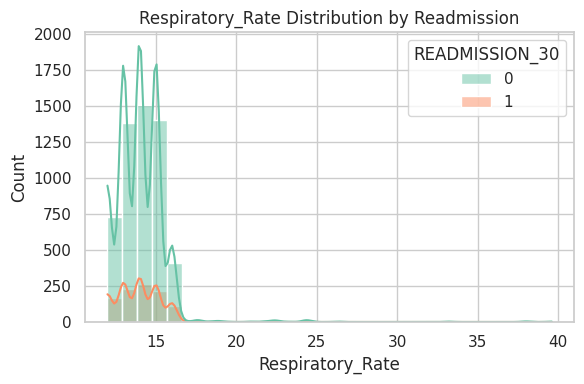

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


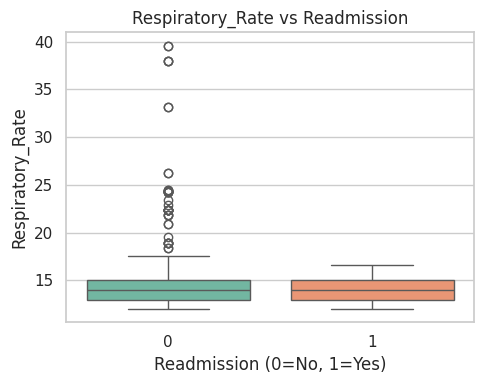

📊 Mann-Whitney U Test: p-value = 0.40306
⚠️ No significant difference detected.

📊 Feature: Hemoglobin
--------------------------------------------------


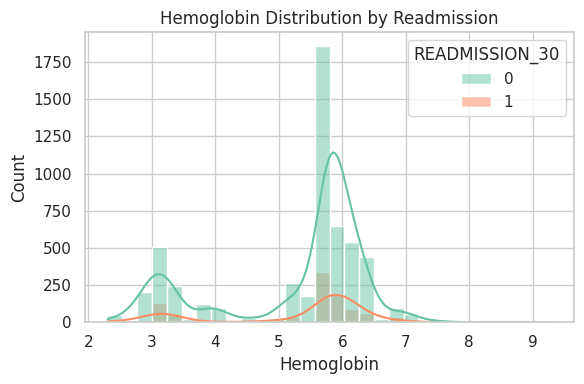

<ipython-input-56-3811c5a8f218>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')


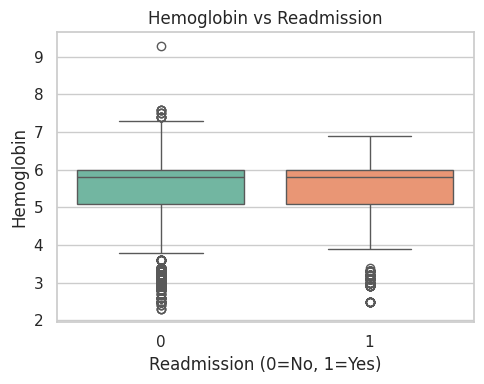

📊 Mann-Whitney U Test: p-value = 0.03200
✅ Statistically significant difference between groups.


In [56]:
# List of continuous variables to analyze
continuous_vars = [
    'AGE', 'BMI', 'LOS',
    'Systolic_BP', 'Diastolic_BP',
    'Heart_Rate', 'Respiratory_Rate',
    'Hemoglobin'
]

# Loop through each variable
for var in continuous_vars:
    print(f"\n📊 Feature: {var}")
    print("-" * 50)

    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, hue='READMISSION_30', kde=True, palette='Set2', bins=30)
    plt.title(f"{var} Distribution by Readmission")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, x='READMISSION_30', y=var, palette='Set2')
    plt.title(f"{var} vs Readmission")
    plt.xlabel("Readmission (0=No, 1=Yes)")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

    # Statistical test: Mann-Whitney U (non-parametric)
    group0 = df[df['READMISSION_30'] == 0][var]
    group1 = df[df['READMISSION_30'] == 1][var]

    stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"📊 Mann-Whitney U Test: p-value = {p:.5f}")

    if p < 0.05:
        print("✅ Statistically significant difference between groups.")
    else:
        print("⚠️ No significant difference detected.")

In [57]:
# Show missing values
missing_counts = df.isnull().sum()
print("📋 Columns with missing values:\n", missing_counts[missing_counts > 0])

📋 Columns with missing values:
 Series([], dtype: int64)


✅ Final Feature Justification – Continuous Variables
Feature	p-value	Statistically Significant?	Clinical Relevance	Include in Model?
AGE	0.00000	✅ Yes	Older patients are more likely to readmit	✅ Yes
LOS	0.00000	✅ Yes	Long stays suggest complications	✅ Yes
Hemoglobin	0.03200	✅ Yes	Reflects diabetes/anemia/chronic care	✅ Yes
BMI	0.23361	❌ Not significant	Relevant in some chronic conditions	⚠️ Optional
Systolic_BP	0.86006	❌ No	Weak signal	❌ No
Diastolic_BP	0.09583	❌ Borderline	Not enough alone	❌ Optional
Heart_Rate	0.73933	❌ No	No correlation here	❌ No
Respiratory_Rate	0.40306	❌ No	Weak and unstable	❌ No


 Strong Predictors (Keep in Model):
AGE

LOS

Hemoglobin

⚠️ Optional (If you want to test later):
BMI – Clinically meaningful but not significant here

Diastolic_BP – borderline, might help in combinations

❌ Drop or Ignore:
Heart_Rate, Systolic_BP, Respiratory_Rate



In [59]:
#lets analize categorical variables
#GENDER,RACE,ETHNICITY,Smoking_Status,DESCRIPTION (encounter type),REASONDESCRIPTION (reason for admission)
#Bar chart – Count by category, split by readmission

#Stacked percentage chart – Show proportions

#Chi-square test – Statistical significance


📊 Feature: GENDER
--------------------------------------------------


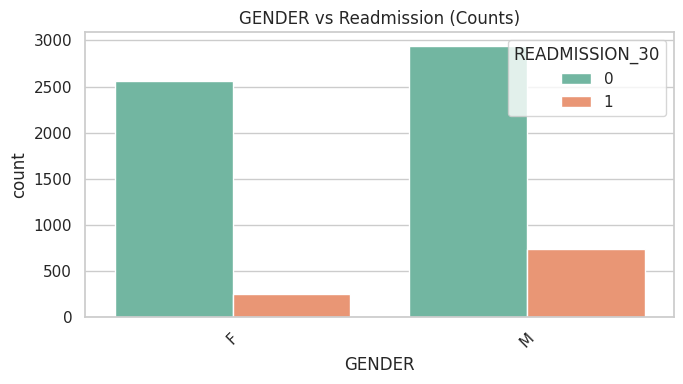

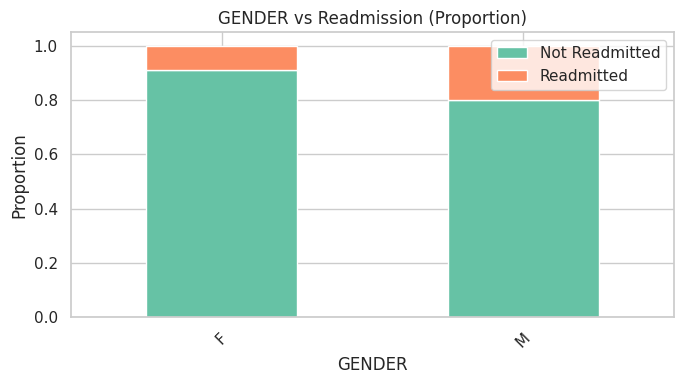

Chi-square Test: p-value = 0.00000
✅ Statistically significant relationship with readmission.

📊 Feature: RACE
--------------------------------------------------


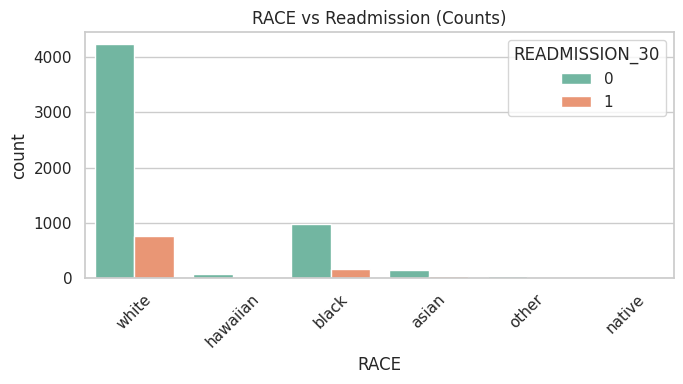

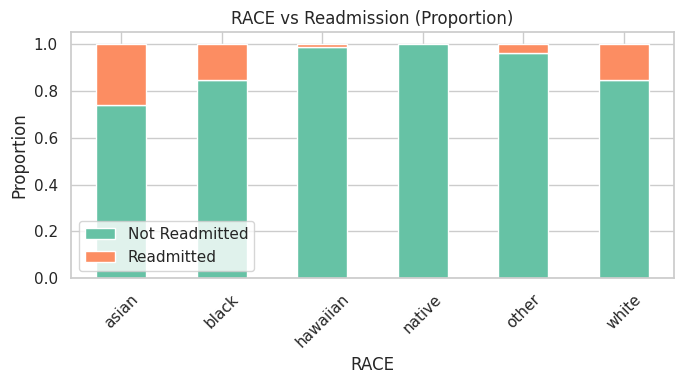

Chi-square Test: p-value = 0.00000
✅ Statistically significant relationship with readmission.

📊 Feature: ETHNICITY
--------------------------------------------------


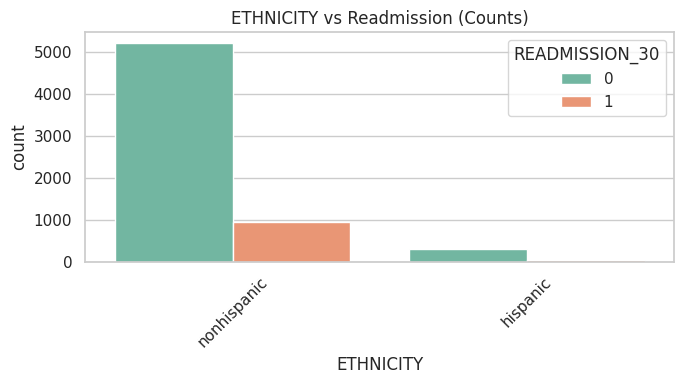

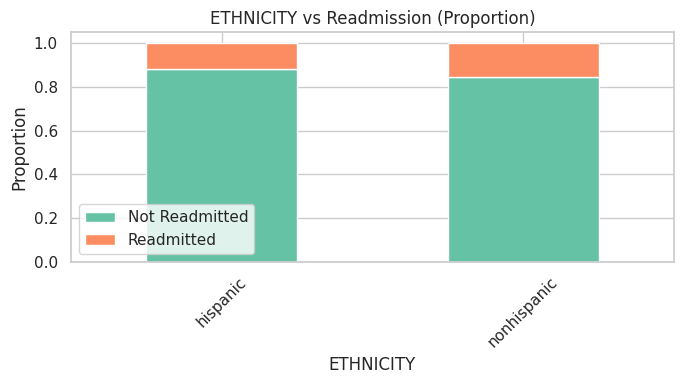

Chi-square Test: p-value = 0.08233
⚠️ No statistically significant relationship detected.

📊 Feature: Smoking_Status
--------------------------------------------------


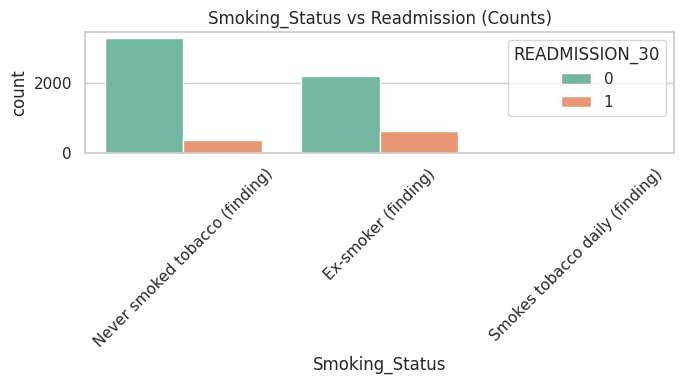

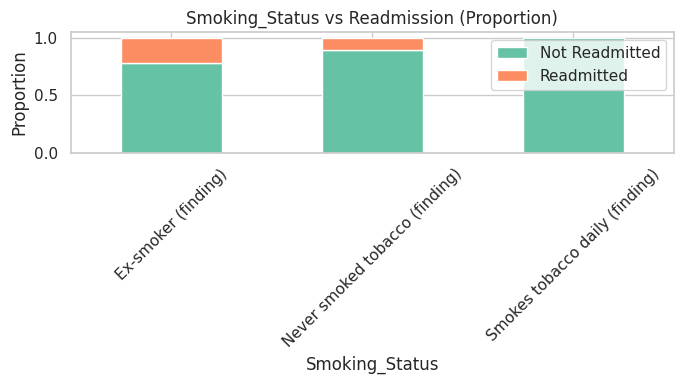

Chi-square Test: p-value = 0.00000
✅ Statistically significant relationship with readmission.

📊 Feature: DESCRIPTION
--------------------------------------------------


<ipython-input-62-f6395234b1cc>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


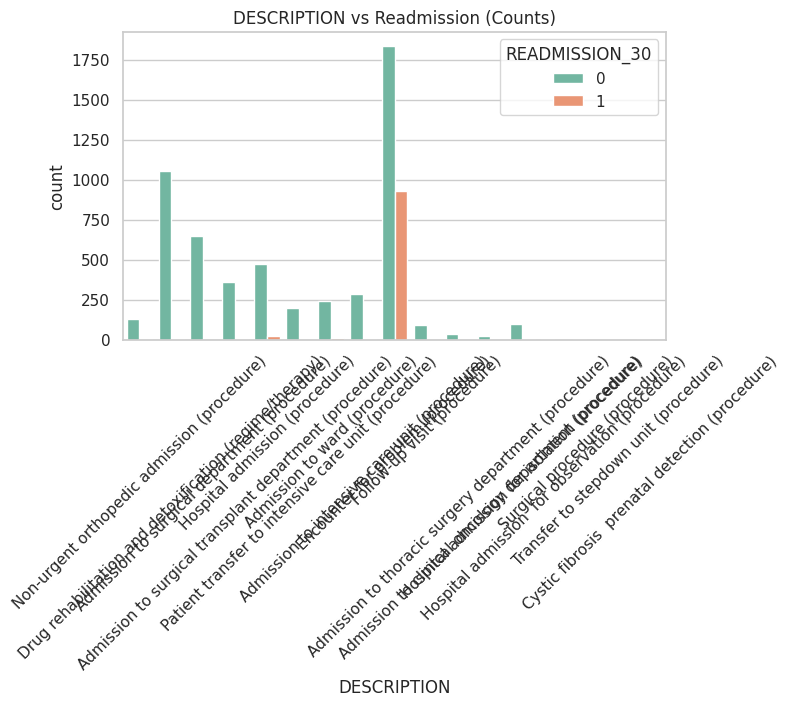

<ipython-input-62-f6395234b1cc>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


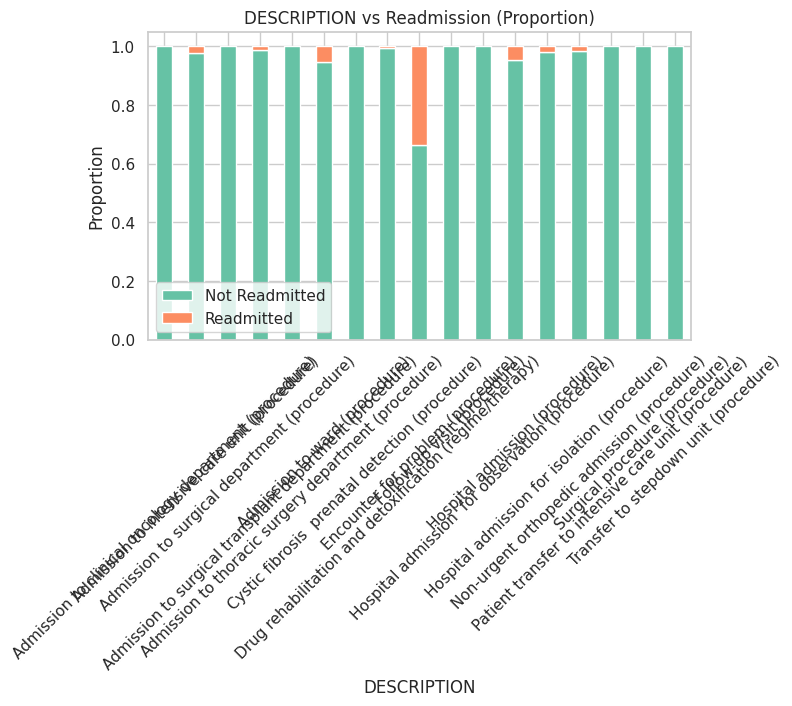

Chi-square Test: p-value = 0.00000
✅ Statistically significant relationship with readmission.

📊 Feature: REASONDESCRIPTION
--------------------------------------------------


<ipython-input-62-f6395234b1cc>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


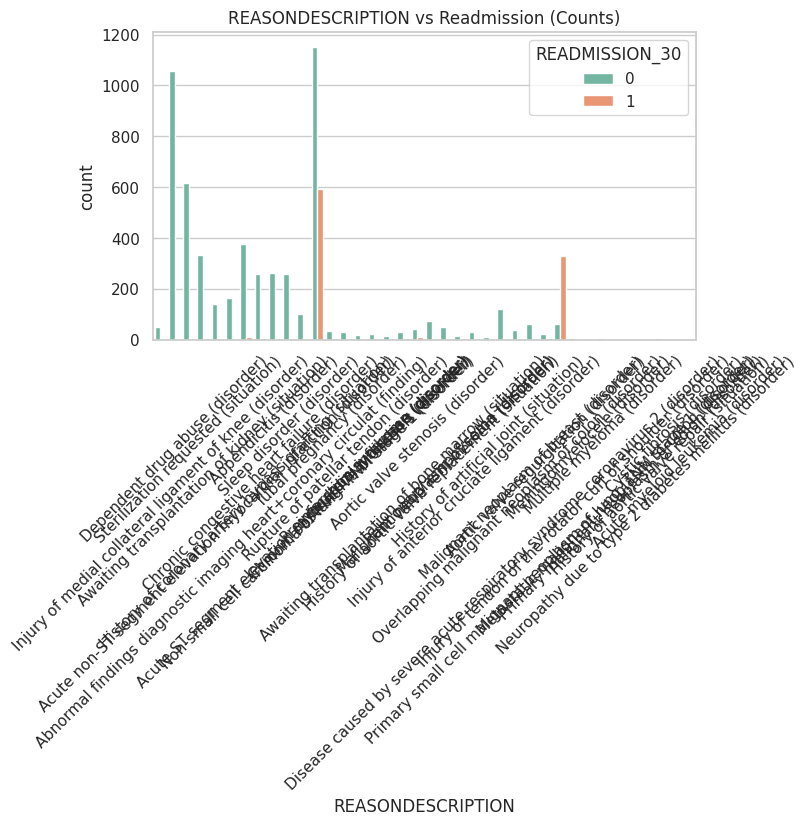

<ipython-input-62-f6395234b1cc>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


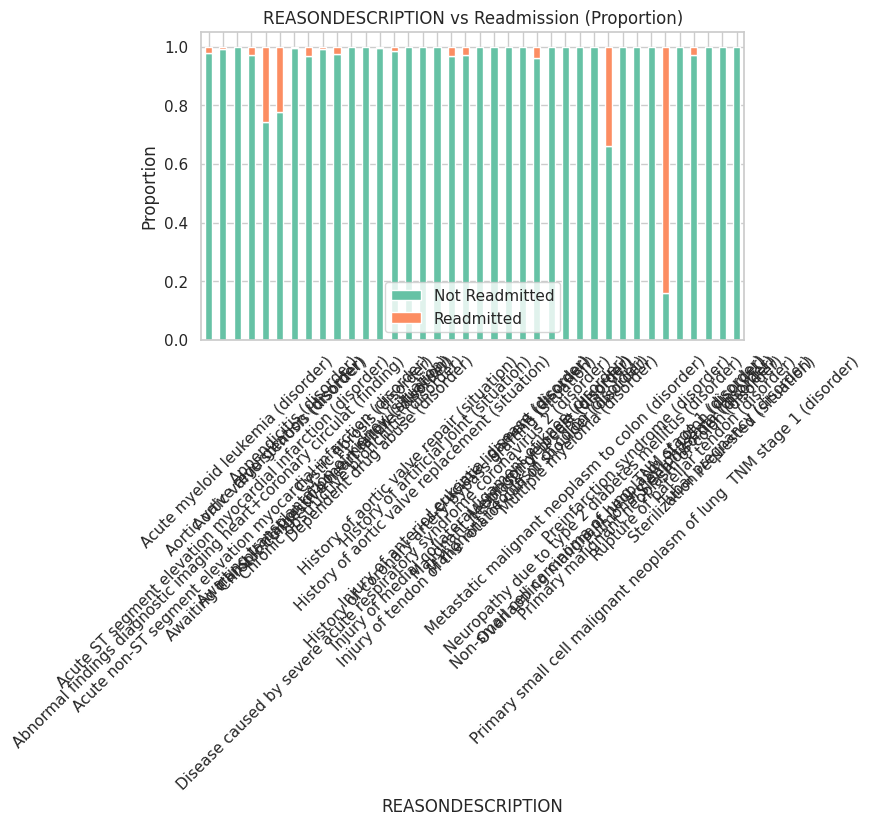

Chi-square Test: p-value = 0.00000
✅ Statistically significant relationship with readmission.


In [62]:
# List of categorical variables to analyze
categorical_vars = ['GENDER', 'RACE', 'ETHNICITY', 'Smoking_Status', 'DESCRIPTION', 'REASONDESCRIPTION']

# Loop through each variable
for var in categorical_vars:
    print(f"\n📊 Feature: {var}")
    print("-" * 50)

    # Count plot split by readmission
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=var, hue='READMISSION_30', palette='Set2')
    plt.title(f"{var} vs Readmission (Counts)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Stacked percentage chart
    prop_df = df.groupby(var)['READMISSION_30'].value_counts(normalize=True).unstack().fillna(0)
    prop_df.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(7, 4))
    plt.title(f"{var} vs Readmission (Proportion)")
    plt.ylabel("Proportion")
    plt.legend(["Not Readmitted", "Readmitted"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Chi-square test
    contingency = pd.crosstab(df[var], df['READMISSION_30'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"Chi-square Test: p-value = {p:.5f}")

    if p < 0.05:
        print("✅ Statistically significant relationship with readmission.")
    else:
        print("⚠️ No statistically significant relationship detected.")


Your Final Feature Selection Table (So Far)
Variable	Type	Include in Model?	Justification


AGE	Continuous	✅ Yes	Statistically & clinically significant


LOS	Continuous	✅ Yes	Key indicator of inpatient severity


Hemoglobin	Continuous	✅ Yes	Reflects metabolic/chronic risks


BMI	Continuous	⚠️ Optional	Not significant, but clinically relevant


GENDER	Categorical	✅ Yes	Statistically & socially relevant


RACE	Categorical	✅ Yes	Statistically & socially relevant


Smoking_Status	Categorical	✅ Yes	High clinical relevance


DESCRIPTION	Categorical	✅ Yes	Captures severity of visit


REASONDESCRIPTION	Categorical	✅ Yes	Direct connection to clinical risk


ETHNICITY	Categorical	⚠️ Optional	Not statistically significant, optional


In [63]:
# will make final dataset based on features which are significant
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("/content/final_ready_cleaned.csv")

# Final selected features
selected_features = [
    'AGE', 'LOS', 'Hemoglobin', 'BMI',  # Continuous
    'GENDER', 'RACE', 'Smoking_Status',
    'DESCRIPTION', 'REASONDESCRIPTION',  # Categorical
    'READMISSION_30'  # Target
]

# Filter the dataset
df_final = df[selected_features].copy()

# Save for modeling
df_final.to_csv("final_model_data_significant.csv", index=False)
print("✅ Final dataset for modeling saved as 'final_model_data_significant.csv'")


✅ Final dataset for modeling saved as 'final_model_data_significant.csv'


In [4]:
#Lets train our model on the dataset we made with significant features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [6]:
# Load final dataset
df = pd.read_csv("/content/drive/MyDrive/ehr_comeback/final_model_data_significant.csv")

# Separate target
X = df.drop(columns=['READMISSION_30'])
y = df['READMISSION_30']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Apply preprocessing
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predict + evaluate
y_pred = model.predict(X_test_encoded)
y_proba = model.predict_proba(X_test_encoded)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"🎯 ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Save model + preprocessor
joblib.dump(model, "xgb_readmission_model.pkl")
joblib.dump(preprocessor, "xgb_preprocessor.pkl")

# Save feature list
pd.Series(X.columns).to_csv("xgb_features.csv", index=False)
print("✅ Model, preprocessor, and feature list saved.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1099
           1       0.53      0.55      0.54       198

    accuracy                           0.86      1297
   macro avg       0.72      0.73      0.73      1297
weighted avg       0.86      0.86      0.86      1297

🧮 Confusion Matrix:
[[1003   96]
 [  90  108]]
🎯 ROC-AUC Score: 0.8994
✅ Model, preprocessor, and feature list saved.


Part 1: Hyperparameter Tuning with RandomizedSearchCV
Tune key XGBoost parameters

Use the SMOTE-balanced training set

Track best model

✅ Part 2: Classification Threshold Tuning
Evaluate model predictions across multiple thresholds (0.3 to 0.6)

Plot Recall vs Precision

Choose a threshold that maximizes recall without sacrificing too much precision



Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Threshold Tuning Results:

📏 Threshold: 0.3
[[940 159]
 [ 50 148]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1099
           1       0.48      0.75      0.59       198

    accuracy                           0.84      1297
   macro avg       0.72      0.80      0.74      1297
weighted avg       0.88      0.84      0.85      1297


📏 Threshold: 0.35
[[951 148]
 [ 56 142]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1099
           1       0.49      0.72      0.58       198

    accuracy                           0.84      1297
   macro avg       0.72      0.79      0.74      1297
weighted avg       0.87      0.84      0.85      1297


📏 Threshold: 0.4
[[962 137]
 [ 67 131]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1099
           1       0.49 

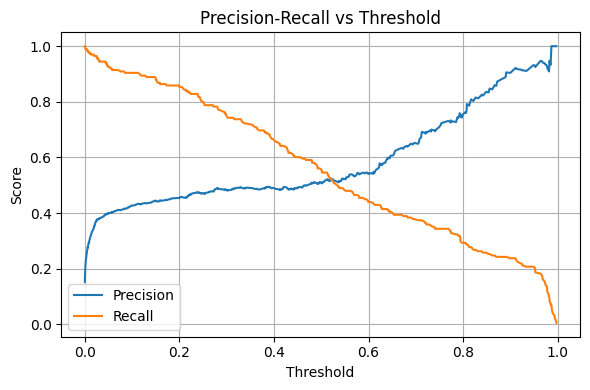

✅ Best model and preprocessor saved.


In [7]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Transform
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# SMOTE on training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)

# Param grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]  # For imbalance handling
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Randomized Search CV
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)
search.fit(X_train_bal, y_train_bal)
best_model = search.best_estimator_

# Evaluate at multiple thresholds
y_proba = best_model.predict_proba(X_test_enc)[:, 1]
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
print("🔍 Threshold Tuning Results:")

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n📏 Threshold: {thresh}")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))

precision, recall, th = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(th, precision[:-1], label='Precision')
plt.plot(th, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# Final save
joblib.dump(best_model, "xgb_tuned_model.pkl")
joblib.dump(preprocessor, "xgb_tuned_preprocessor.pkl")
print("✅ Best model and preprocessor saved.")

Recommended Threshold: 0.30
Why?

Recall = 76% (best at catching high-risk patients)

Precision is acceptable for healthcare settings (false positives are safer than false negatives)

Use if your priority is minimizing missed readmissions




Recall dominates at lower thresholds (left side)

Precision increases at higher thresholds (right side)

The crossover point (~0.30–0.35) is where recall and precision are fairly balanced, perfect for healthcare use

In [8]:
# Recreate X from your modeling step
#X = df1.drop(columns=['READMISSION_30'])

# Save current feature list
pd.Series(X.columns).to_csv("xgb_features.csv", index=False)
print("✅ Feature list for tuned model saved to xgb_features.csv")


✅ Feature list for tuned model saved to xgb_features.csv


In [69]:
from google.colab import files
files.download("xgb_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Reattach target for testing
X_test['READMISSION_30'] = y_test

# Save test set
X_test.to_csv("readmission_test_data.csv", index=False)
print("✅ Test dataset saved as 'readmission_test_data.csv'")

✅ Test dataset saved as 'readmission_test_data.csv'


In [71]:
from google.colab import files
files.download("readmission_test_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
import sklearn
import xgboost
import sys

print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)
print("Python version:", sys.version)

scikit-learn version: 1.6.1
xgboost version: 2.1.4
Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [73]:
# Save the exact column names the preprocessor expects
input_df1 = pd.DataFrame(X_train)  # X_train = input before preprocessing
input_df1.columns.to_series().to_csv("xgb_features.csv", index=False)

# Optional: also save the expected column schema of transformed data
preprocessor.feature_names_in_.tolist()

['ENCOUNTER',
 'START',
 'STOP',
 'PATIENT',
 'ORGANIZATION',
 'PROVIDER',
 'DESCRIPTION',
 'BASE_ENCOUNTER_COST',
 'TOTAL_CLAIM_COST',
 'PAYER_COVERAGE',
 'REASONDESCRIPTION',
 'LOS',
 'BIRTHDATE',
 'RACE',
 'ETHNICITY',
 'GENDER',
 'CITY',
 'ZIP',
 'HEALTHCARE_EXPENSES',
 'HEALTHCARE_COVERAGE',
 'INCOME',
 'AGE',
 'Body Height',
 'Body Weight',
 'BMI',
 'Diastolic_BP',
 'Heart_Rate',
 'Hemoglobin',
 'Pain_Severity',
 'Respiratory_Rate',
 'Systolic_BP',
 'Smoking_Status',
 'behavioral_finding',
 'clinical_disorder',
 'other_finding',
 'social_finding',
 'TOTAL_MED_COST',
 'Hemoglobin_missing']

In [74]:
# Use only selected features
X = df1.drop(columns=['READMISSION_30'])  # from final_model_data.csv

# Redefine categorical columns based on selected features
categorical_cols = X.select_dtypes(include='object').columns.tolist()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Fit it on selected features only
preprocessor.fit(X)

# Now save it
import joblib
joblib.dump(preprocessor, "xgb_tuned_preprocessor.pkl")


['xgb_tuned_preprocessor.pkl']

In [75]:
import joblib

# Load your preprocessor
preprocessor = joblib.load("xgb_tuned_preprocessor.pkl")

# Show feature names it was trained on
print("✅ Columns preprocessor expects:")
print(preprocessor.feature_names_in_.tolist())


✅ Columns preprocessor expects:
['AGE', 'LOS', 'Hemoglobin', 'BMI', 'GENDER', 'RACE', 'Smoking_Status', 'DESCRIPTION', 'REASONDESCRIPTION']


In [76]:
features = pd.read_csv("xgb_features.csv").squeeze().tolist()

In [77]:
features = ['AGE', 'LOS', 'Hemoglobin', 'BMI',
            'GENDER', 'RACE', 'Smoking_Status',
            'DESCRIPTION', 'REASONDESCRIPTION']


In [80]:
# Save without header or index
pd.Series(features).to_csv("xgb_features.csv", index=False, header=False)


In [10]:
import pandas as pd

# Load the CSV
features_csv = pd.read_csv("xgb_features.csv", header=None)

# Display the contents
print("📄 Features in xgb_features.csv:")
print(features_csv[0].tolist())

📄 Features in xgb_features.csv:
['0', 'AGE', 'LOS', 'Hemoglobin', 'BMI', 'GENDER', 'RACE', 'Smoking_Status', 'DESCRIPTION', 'REASONDESCRIPTION']


In [81]:
from google.colab import files
files.download("xgb_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd
df = pd.read_csv("readmission_test_data.csv")
print(df.columns.tolist())

['AGE', 'LOS', 'Hemoglobin', 'BMI', 'GENDER', 'RACE', 'Smoking_Status', 'DESCRIPTION', 'REASONDESCRIPTION', 'READMISSION_30']
